# Import Library

In [ ]:
!pip install Kaggle

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from PIL import Image
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Import Dataset

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download -d msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 99% 60.0M/60.3M [00:03<00:00, 27.9MB/s]
100% 60.3M/60.3M [00:03<00:00, 18.9MB/s]


In [ ]:
import zipfile
import os

# Path ke file zip yang telah diunduh
zip_file_path = 'fer2013.zip'

# Membuat direktori untuk mengekstrak file
extract_dir = 'fer2013_data'
os.makedirs(extract_dir, exist_ok=True)

# Mengekstrak file zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Menampilkan isi dari direktori yang diekstrak
extracted_files = os.listdir(extract_dir)
print("File yang diekstrak:", extracted_files)

File yang diekstrak: ['train', 'test']


In [ ]:
train_dir = os.path.join(extract_dir, 'train')
test_dir = os.path.join(extract_dir, 'test')

# Menampilkan isi dari direktori 'train'
print("Isi dari direktori 'train':", os.listdir(train_dir))

# Menampilkan isi dari direktori 'test'
print("Isi dari direktori 'test':", os.listdir(test_dir))

Isi dari direktori 'train': ['angry', 'neutral', 'happy', 'fear', 'surprise', 'sad', 'disgust']
Isi dari direktori 'test': ['angry', 'neutral', 'happy', 'fear', 'surprise', 'sad', 'disgust']


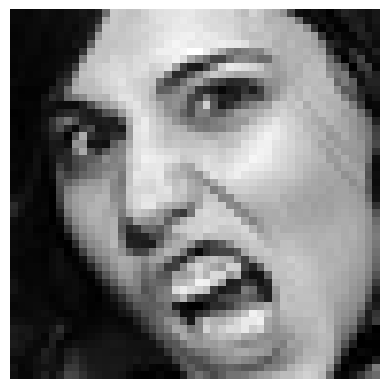

In [ ]:
# Contoh memuat gambar dari direktori 'train'
sample_image_path = os.path.join(train_dir, os.listdir(train_dir)[0], os.listdir(os.path.join(train_dir, os.listdir(train_dir)[0]))[0])

# Menampilkan gambar
img = Image.open(sample_image_path)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Memuat data pelatihan
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),  # Sesuaikan dengan resolusi asli dataset
    batch_size=32,
    color_mode='grayscale',  # Mengatur color_mode menjadi grayscale
    class_mode='categorical'  # Mengubah menjadi 'categorical' untuk 7 kelas
)

# Memuat data pengujian
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),  # Sesuaikan dengan resolusi asli dataset
    batch_size=32,
    color_mode='grayscale',  # Mengatur color_mode menjadi grayscale
    class_mode='categorical'  # Mengubah menjadi 'categorical' untuk 7 kelas
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


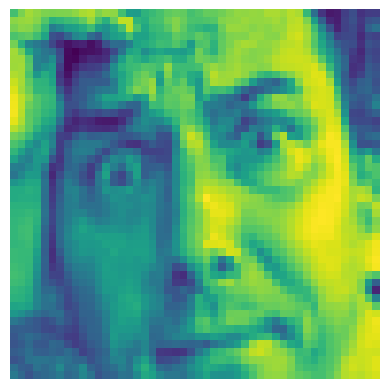

In [ ]:
# Ambil satu batch gambar dari train_generator
data_batch, labels_batch = next(train_generator)

# Pilih satu gambar dari batch
sample_image = data_batch[2]

# Tampilkan gambar menggunakan matplotlib
plt.imshow(sample_image)
plt.axis('off') # Matikan axis untuk visualisasi lebih bersih
plt.show()

# Model CNN

In [ ]:
# Model CNN untuk klasifikasi emosi
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),  # Input shape untuk grayscale (48x48x1)
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # Menggunakan 7 unit dengan aktivasi 'softmax'
])

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,145,351 (4.37 MB)

 Trainable params: 1,145,351 (4.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


897/897 ━━━━━━━━━━━━━━━━━━━━ 151s 165ms/step - accuracy: 0.2796 - loss: 1.7695 - val_accuracy: 0.4198 - val_loss: 1.5147
Epoch 2/20
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 57us/step - accuracy: 0.3125 - loss: 1.5385 - val_accuracy: 0.3000 - val_loss: 1.6732
Epoch 3/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


897/897 ━━━━━━━━━━━━━━━━━━━━ 141s 157ms/step - accuracy: 0.4095 - loss: 1.5201 - val_accuracy: 0.4731 - val_loss: 1.3751
Epoch 4/20
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 39us/step - accuracy: 0.4062 - loss: 1.4363 - val_accuracy: 0.7000 - val_loss: 0.9785
Epoch 5/20
897/897 ━━━━━━━━━━━━━━━━━━━━ 140s 155ms/step - accuracy: 0.4626 - loss: 1.4114 - val_accuracy: 0.4973 - val_loss: 1.2967
Epoch 6/20
897/897 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5000 - loss: 1.2352 - val_accuracy: 0.6000 - val_loss: 1.0890
Epoch 7/20
897/897 ━━━━━━━━━━━━━━━━━━━━ 137s 152ms/step - accuracy: 0.4899 - loss: 1.3424 - val_accuracy: 0.5230 - val_loss: 1.2479
Epoch 8/20
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 39us/step - accuracy: 0.4375 - loss: 1.4115 - val_accuracy: 0.3000 - val_loss: 1.5591
Epoch 9/20
897/897 ━━━━━━━━━━━━━━━━━━━━ 139s 155ms/step - accuracy: 0.5006 - loss: 1.2996 - val_accuracy: 0.5389 - val_loss: 1.2150
Epoch 10/20
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 40us/step - accuracy: 0.3438 - loss: 1.4380 - val_acc

# Evaluasi

## Grafik Kurva Train dan Validation Loss

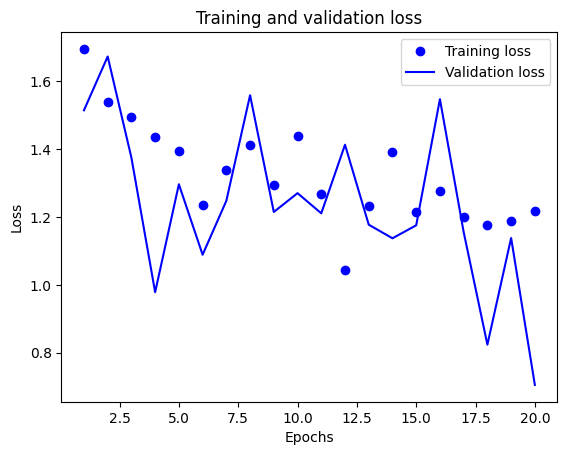

In [ ]:
# Plot the train and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Grafik Kurva Train dan Validation Accuracy

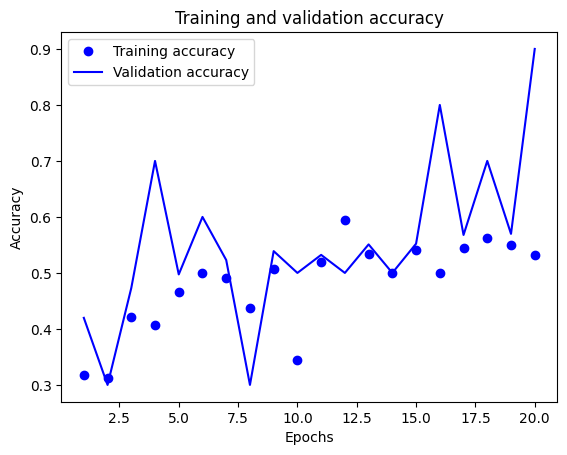

In [ ]:
# Plot the train and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save Model

In [ ]:
# Menyimpan model yang sudah dilatih
model.save('face_expression_model.h5')

# Memuat Model

In [ ]:
from tensorflow.keras.models import load_model

# Memuat model yang sudah disimpan
loaded_model = load_model('face_expression_model.h5')

Saving orang happy.jpg to orang happy.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


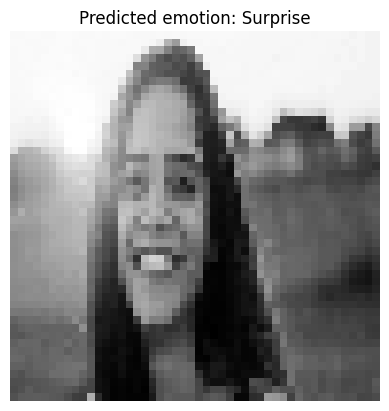

In [ ]:
# Mengupload gambar baru
from google.colab import files
uploaded = files.upload()

# Asumsi hanya satu gambar yang diupload
img_path = next(iter(uploaded.keys()))

# Memuat gambar dan mengubahnya menjadi ukuran yang sesuai
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch

# Normalisasi gambar
img_array = img_array / 255.0

# Melakukan prediksi
predictions = loaded_model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Label emosi
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Tampilkan gambar dan prediksi
plt.imshow(img, cmap='gray')
plt.title(f"Predicted emotion: {emotion_labels[predicted_class[0]]}")
plt.axis('off')
plt.show()